# Prediction using Supervised ML
### Submitted by: Abdullah Jami

#### Importing Libraries

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Importing dataset and creating dataframe

In [2]:
Dataset_url = "http://bit.ly/w-data" 
try: 
    df = pd.read_csv(filepath_or_buffer=Dataset_url)
    print("Dataset imported successfully and dataframe created")
except:
    print("Could not import dataset")

Dataset imported successfully and dataframe created


#### Exploratory Data Analysis EDA

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


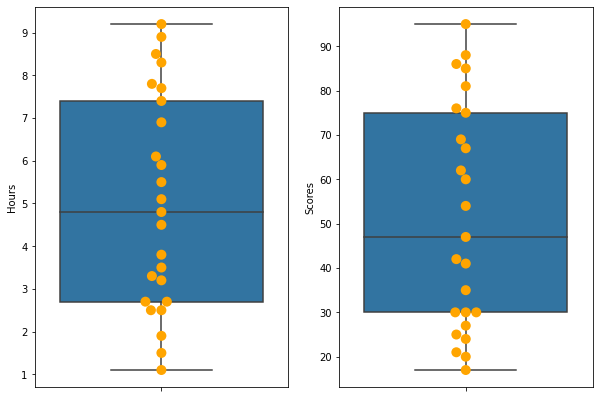

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 7))
ax1 = sns.boxplot(df["Hours"], ax = axes[0], orient ="v")
ax1 = sns.swarmplot(df["Hours"], color = "orange", ax = axes[0], orient ="v", size=10)
ax2 = sns.boxplot(df["Scores"], ax = axes[1], orient ="v")
ax2 = sns.swarmplot(df["Scores"], color = "orange", ax = axes[1], orient ="v", size=10)
plt.show()

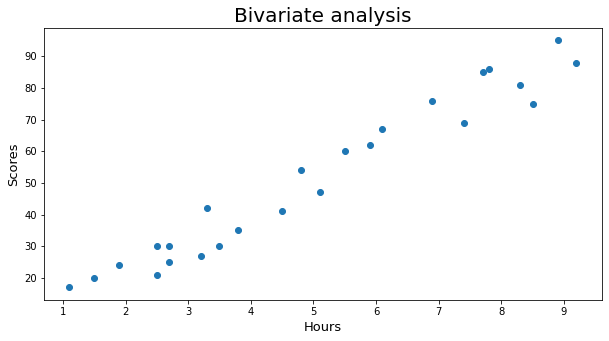

In [8]:
plt.figure(figsize=[10, 5])
plt.title("Bivariate analysis", fontsize = 20)
plt.scatter(df["Hours"], df["Scores"])
plt.xlabel("Hours", fontsize = 13)
plt.ylabel("Scores", fontsize = 13)
# Show the plot
plt.show()

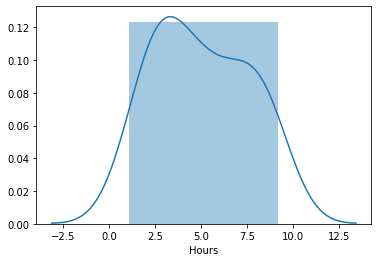

In [9]:
sns.distplot(df["Hours"], bins=1)

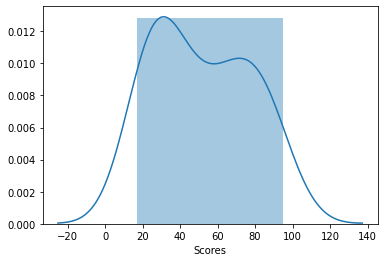

In [10]:
sns.distplot(df["Scores"], bins = 1)

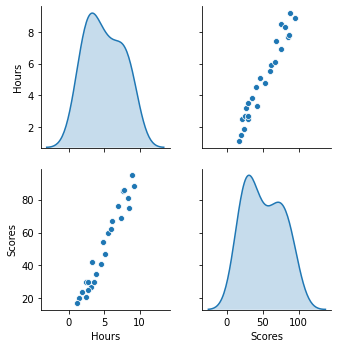

In [11]:
sns.pairplot(df, diag_kind = "kde")

In [12]:
# corelation between target and feature variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Running Shapiro wilk test for normality check

In [13]:
cols = df.columns
cols[0]

'Hours'

In [14]:
from scipy.stats import shapiro , anderson
cols = df.columns
for col in cols:
    W_stat, p_value = shapiro(df[col])
    print(f"W statistic and p-value for {col}: ", round(W_stat,4), round(p_value,4))
    if p_value <0.05:
        print(f"We reject the null hypothesis i.e. the {col} data is not normally distributed.\n")
    else:
        print(f"We Accept the null hypothesis i.e. the {col} data is normally distributed.\n")

W statistic and p-value for Hours:  0.9401 0.1491
We Accept the null hypothesis i.e. the Hours data is normally distributed.

W statistic and p-value for Scores:  0.9168 0.0434
We reject the null hypothesis i.e. the Scores data is not normally distributed.



#### Running Anderson-Darling test for normality check

In [15]:
anderson(df["Hours"])

AndersonResult(statistic=0.4971082246028402, critical_values=array([0.514, 0.586, 0.703, 0.82 , 0.975]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [16]:
anderson(df["Scores"])

AndersonResult(statistic=0.7269805460454677, critical_values=array([0.514, 0.586, 0.703, 0.82 , 0.975]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

## <font color="blue">Insights: </font>
    1. The feature variable is normally distributed but the Target variable is not normally distributed
    2. As the sample size is small, resampling using bootstrap technique is advised

#### Data Preparation

In [17]:
y2 = df[["Scores"]]
x2 = df[["Hours"]]
print("Shape :", x2.shape, y2.shape)

Shape : (25, 1) (25, 1)


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, test_size=0.2, random_state = 1000)

In [19]:
print("Shape of datasets")
print(f"X_train={X_train.shape} \nX_test={X_test.shape} \nY_train={Y_train.shape} \nY_test={Y_test.shape}")

Shape of datasets
X_train=(20, 1) 
X_test=(5, 1) 
Y_train=(20, 1) 
Y_test=(5, 1)


#### Running Linear regression using sklearn

##### Model1

In [20]:
Reg_skl1 = LinearRegression()
Result_skl1 = Reg_skl1.fit(X_train, Y_train)

In [21]:
print("coefficient: ", Result_skl1.coef_[0])
print("Intercept: ", Result_skl1.intercept_)
print("train data R squared score : ", Result_skl1.score(X_train, Y_train))
print("test data R squared score : ", Result_skl1.score(X_test, Y_test))

coefficient:  [10.19830665]
Intercept:  [0.96300107]
train data R squared score :  0.9554112436525921
test data R squared score :  0.9302680202491882


In [22]:
y_pred_skl1 = Result_skl1.predict(X_test)
y_pred_skl1

array([[16.26046105],
       [39.71656635],
       [87.64860761],
       [94.78742226],
       [80.50979295]])

In [23]:
print("Shape of datasets")
print(f"X_train={X_train.shape} \nX_test={X_test.shape} \nY_train={Y_train.shape} \nY_test={Y_test.shape}")

Shape of datasets
X_train=(20, 1) 
X_test=(5, 1) 
Y_train=(20, 1) 
Y_test=(5, 1)


In [24]:
#Error_skl1 = pd.DataFrame()
Error_skl1 = X_test.copy()
Error_skl1["Actuals"] = Y_test.values
Error_skl1["Predictions"] = y_pred_skl1
Error_skl1["Error"] = Error_skl1["Actuals"] - Error_skl1["Predictions"]
Error_skl1

,Hours,Actuals,Predictions,Error
5,1.5,20,16.260461,3.739539
22,3.8,35,39.716566,-4.716566
3,8.5,75,87.648608,-12.648608
6,9.2,88,94.787422,-6.787422
24,7.8,86,80.509793,5.490207


In [25]:
print("Shape of datasets")
print(f"X_train={X_train.shape} \nX_test={X_test.shape} \nY_train={Y_train.shape} \nY_test={Y_test.shape}")

Shape of datasets
X_train=(20, 1) 
X_test=(5, 1) 
Y_train=(20, 1) 
Y_test=(5, 1)


In [26]:
mse_skl1 = mean_squared_error(Error_skl1["Actuals"], Error_skl1["Predictions"])
print(f"Mean squared Error for model1: {mse_skl1}")
rmse_skl1 = np.sqrt(mse_skl1)
print(f"Root Mean squared Error for model1: {rmse_skl1}")
R_sq = r2_score(Error_skl1["Actuals"], Error_skl1["Predictions"])
print(f"Test R squared: {R_sq}")


Mean squared Error for model1: 54.485779698094326
Root Mean squared Error for model1: 7.381448346909591
Test R squared: 0.9302680202491882


Visualizing Model1 by sklearn (Intercept included)

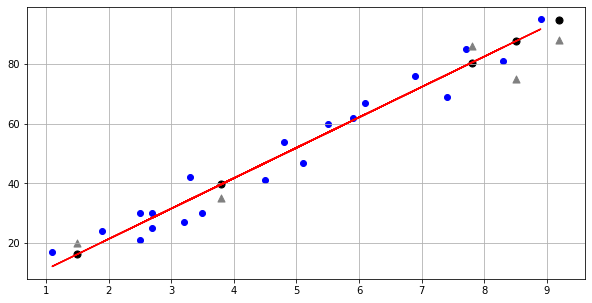

In [27]:
plt.figure(figsize = (10,5))
plt.plot(X_train, Result_skl1.predict(X_train),  color='red') 
plt.scatter(X_train, Y_train,  color='blue')
plt.scatter(X_test, Y_test,  color='grey', marker = '^', s = 50)
plt.scatter(X_test, Result_skl1.predict(X_test),  color='black', s = 50)
plt.grid()
plt.show()

##### Model2

In [28]:
Reg_skl2 = LinearRegression(fit_intercept=False)
Result_skl2 = Reg_skl2.fit(X_train, Y_train)

In [29]:
print("coefficient: ", Result_skl2.coef_[0])
print("Intercept: ", Result_skl2.intercept_)
print("train data R squared score : ", Result_skl2.score(X_train, Y_train))
print("test data R squared score : ", Result_skl2.score(X_test, Y_test))

coefficient:  [10.36479391]
Intercept:  0.0
train data R squared score :  0.9550995412278072
test data R squared score :  0.9254176675419672


In [30]:
y_pred_skl2 = Result_skl2.predict(X_test)
y_pred_skl2

array([[15.54719087],
       [39.38621686],
       [88.10074825],
       [95.35610399],
       [80.84539251]])

In [31]:
Error_skl2 = X_test.copy()
Error_skl2["Actuals"] = Y_test.values
Error_skl2["Predictions"] = y_pred_skl2
Error_skl2["Error"] = Error_skl2["Actuals"] - Error_skl2["Predictions"]
Error_skl2

,Hours,Actuals,Predictions,Error
5,1.5,20,15.547191,4.452809
22,3.8,35,39.386217,-4.386217
3,8.5,75,88.100748,-13.100748
6,9.2,88,95.356104,-7.356104
24,7.8,86,80.845393,5.154607


In [32]:
mse_skl2 = mean_squared_error(Error_skl2["Actuals"], Error_skl2["Predictions"])
print(f"Mean squared Error for model2: {mse_skl2}")
rmse_skl2 = np.sqrt(mse_skl2)
print(f"Root Mean squared Error for model2: {rmse_skl2}")
R_sq = r2_score(Error_skl2["Actuals"], Error_skl2["Predictions"])
print(f"Test R squared: {R_sq}")

Mean squared Error for model2: 58.27565128940851
Root Mean squared Error for model2: 7.633849048115145
Test R squared: 0.9254176675419672


Visualizing Model2 by sklearn (Intercept Excluded)

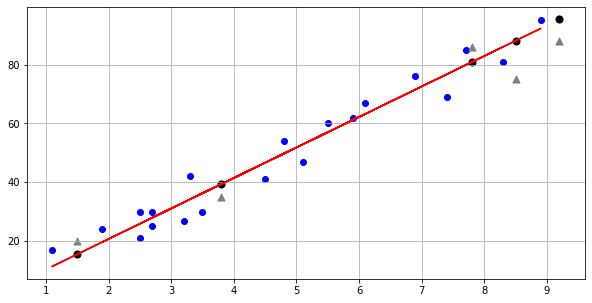

In [33]:
plt.figure(figsize = (10,5))
plt.plot(X_train, Result_skl2.predict(X_train),  color='red') 
plt.scatter(X_train, Y_train,  color='blue')
plt.scatter(X_test, Y_test,  color='grey', marker = '^', s = 50)
plt.scatter(X_test, Result_skl2.predict(X_test),  color='black', s = 50)
plt.grid()
plt.show()

#### Note:
* Calculating p-value of model1 and model2 to check significance of parameters

#### Running linear regression using statsmodels

##### Model3

In [34]:
import statsmodels.api as sm

In [35]:
X_train.shape

(20, 1)

In [36]:
X_test.shape

(5, 1)

In [37]:
modx_train = sm.add_constant(X_train)
modx_test = sm.add_constant(X_test)

C:\Users\Abdullah\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [38]:
print("Shape of datasets")
print(f"X_train: {modx_train.shape}\nX_test: {modx_test.shape}")

Shape of datasets
X_train: (20, 2)
X_test: (5, 2)


In [39]:
model3 = sm.OLS(Y_train, modx_train)
result_sm1 = model3.fit()
result_sm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     385.7
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.32e-13
Time:                        10:11:25   Log-Likelihood:                -60.281
No. Observations:                  20   AIC:                             124.6
Df Residuals:                      18   BIC:                             126.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9630      2.715      0.355      0.727      -4.741       6.667
Hours         10.1983      0.519     19.639      0.000       9.107      11.289
==============================================================================
Omnibus:                       10.944   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                2.318
Skew:                          -0.269   Prob(JB):                        0.314
Kurtosis:                       1.421   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
y_pred_sm1 = result_sm1.predict(modx_test)
y_pred_sm1

5     16.260461
22    39.716566
3     87.648608
6     94.787422
24    80.509793
dtype: float64

In [41]:
Error_sm1 = X_test.copy()
Error_sm1["Actuals"] = Y_test.values
Error_sm1["Predictions"] = y_pred_sm1
Error_sm1["Error"] = Error_sm1["Actuals"] - Error_sm1["Predictions"]
Error_sm1

,Hours,Actuals,Predictions,Error
5,1.5,20,16.260461,3.739539
22,3.8,35,39.716566,-4.716566
3,8.5,75,87.648608,-12.648608
6,9.2,88,94.787422,-6.787422
24,7.8,86,80.509793,5.490207


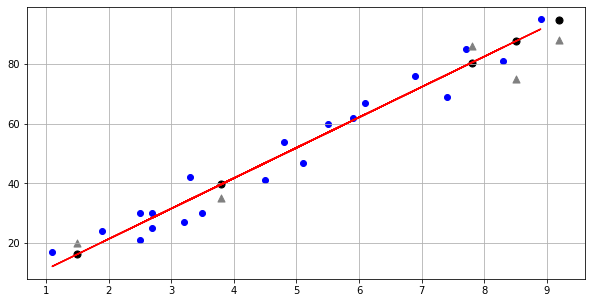

In [42]:
plt.figure(figsize = (10,5))
plt.plot(X_train, result_sm1.predict(modx_train),  color='red')  # beacuse it have only  Train data - Regression line (eq can also be used)
plt.scatter(X_train, Y_train,  color='blue')
plt.scatter(X_test, Y_test,  color='grey', marker = '^', s = 50)
plt.scatter(X_test, result_sm1.predict(modx_test),  color='black', s = 50)    # y_pred = lm.predict(test)  -- Test  data 
plt.grid()
plt.show()

##### Model4

In [43]:
# Testing mode without intercept 
model4 = sm.OLS(Y_train, X_train)
result_sm2 = model4.fit()
result_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Scores   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              2280.
Date:                Wed, 09 Dec 2020   Prob (F-statistic):                    2.96e-21
Time:                        10:11:26   Log-Likelihood:                         -60.350
No. Observations:                  20   AIC:                                      122.7
Df Residuals:                      19   BIC:                                      123.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Hours         10.3648      0.217     47.754      0.000       9.911      10.819
==============================================================================
Omnibus:                        9.519   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                2.197
Skew:                          -0.263   Prob(JB):                        0.333
Kurtosis:                       1.464   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color= "green">Insights: </font>
1. The model without intercept performs the best out of other models on training dataset. Following are the observations:
    1. R squared value has increased.
    2. F-statistic has increased significantly and hence the it is statistically significant.
    3. AIC and standard error terms have reduced
2. Hence, we have reached the conclusion that the value of intercept is zero or the line passes theough the origin.
3. The value of coef = 10.3648

### Assumptions:
* In this study, if we have two cases:
    * Case 1. - If Hour is equal to zero, the score should be zero too
    * Case 2. - Else the score obtained if Hour equal to zero is by chance (guessed) and considering this would be futile.
* Hence in this particular scenario, the intercept obtained is just noise and needs to be ignored.

In [44]:
y_pred_sm2 = result_sm2.predict(X_test)
y_pred_sm2

5     15.547191
22    39.386217
3     88.100748
6     95.356104
24    80.845393
dtype: float64

In [45]:
Error_sm2 = X_test.copy()
Error_sm2["Actuals"] = Y_test.values
Error_sm2["Predictions"] = y_pred_sm2
Error_sm2["Error"] = Error_sm2["Actuals"] - Error_sm2["Predictions"]
Error_sm2

,Hours,Actuals,Predictions,Error
5,1.5,20,15.547191,4.452809
22,3.8,35,39.386217,-4.386217
3,8.5,75,88.100748,-13.100748
6,9.2,88,95.356104,-7.356104
24,7.8,86,80.845393,5.154607


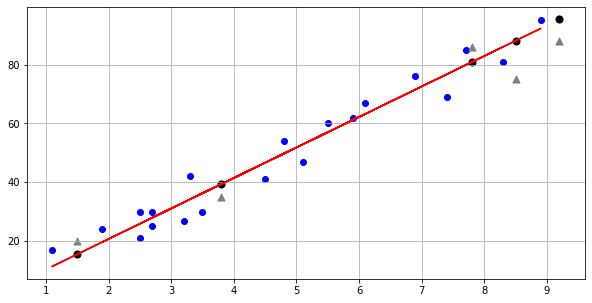

In [46]:
plt.figure(figsize = (10,5))
plt.plot(X_train, result_sm2.predict(X_train),  color='red') 
plt.scatter(X_train, Y_train,  color='blue')
plt.scatter(X_test, Y_test,  color='grey', marker = '^', s = 50)
plt.scatter(X_test, result_sm2.predict(X_test),  color='black', s = 50)
plt.grid()
plt.show()

### Prediction for Hour = 9.25

In [47]:
Hour = 9.25
y_pred_value = result_sm2.predict(Hour)
y_pred_value

array([98.46554216])